## Bayes Rule
<img src = "br.png">

### it is called idot bayes, because the calcualation of probability for each classes are simplified
### assumed to be conditionally independent between each classes (i.e. attribues do not interact)


## Gausian PDF
<img src = "gaussian.png">

### Calculating probability likelihood of observing real value of X1 is difficult
### So assuming X1 is drawn by bell curve distribution
### Gaussian PDF can be easily drawn using only mean and stdev.

In [1]:
#Naive Bayes
# Example of separating data by class value

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


In [2]:
# Example of summarizing a dataset
from math import sqrt

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	for col in zip(*dataset):
		print(col)
	del(summaries[-1])
	return summaries

# Test summarizing a dataset
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
print('summaries = [(mean, stdev, total rows]')
summary = summarize_dataset(dataset)
print(summary)

summaries = [(mean, stdev, total rows]
(3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817)
(2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231)
(0, 0, 0, 0, 0, 1, 1, 1, 1, 1)
[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


In [8]:
# Example of summarizing data by class value
from math import sqrt
from pprint import pprint
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	for col in zip(*dataset):
		print("----in summarize_dataset {}".format(col))
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	pprint("seperated {}".format(separated))
	summaries = dict()
	for class_value, rows in separated.items():
		print("class value {}, rows {}".format(class_value, rows))
		summaries[class_value] = summarize_dataset(rows)
		print("in summary {}".format(summaries))
	print("summary")
	print(summaries)
	return summaries

# Test summarizing by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summary = summarize_by_class(dataset)
for label in summary:
	print(label)
	for row in summary[label]:
		print(row)

('seperated {0: [[3.393533211, 2.331273381, 0], [3.110073483, 1.781539638, 0], '
 '[1.343808831, 3.368360954, 0], [3.582294042, 4.67917911, 0], [2.280362439, '
 '2.866990263, 0]], 1: [[7.423436942, 4.696522875, 1], [5.745051997, '
 '3.533989803, 1], [9.172168622, 2.511101045, 1], [7.792783481, 3.424088941, '
 '1], [7.939820817, 0.791637231, 1]]}')
class value 0, rows [[3.393533211, 2.331273381, 0], [3.110073483, 1.781539638, 0], [1.343808831, 3.368360954, 0], [3.582294042, 4.67917911, 0], [2.280362439, 2.866990263, 0]]
----in summarize_dataset (3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439)
----in summarize_dataset (2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263)
----in summarize_dataset (0, 0, 0, 0, 0)
in summary {0: [(2.7420144012, 0.9265683289298018, 5), (3.0054686692, 1.1073295894898725, 5)]}
class value 1, rows [[7.423436942, 4.696522875, 1], [5.745051997, 3.533989803, 1], [9.172168622, 2.511101045, 1], [7.792783481, 3.424088941, 1], [7.939820817,

### Gaussian PDF example

test gaussian prabability
0.3989422804014327
0.24197072451914337
0.24197072451914337


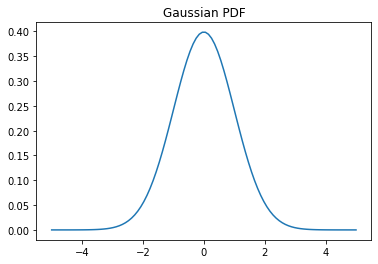

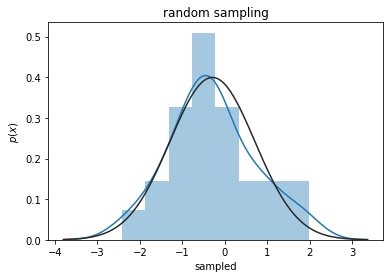

In [11]:
# Example of Gaussian PDF
from math import sqrt
from math import pi
from math import exp

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Test Gaussian PDF
print("test gaussian prabability")
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

# GPDF graph
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

mu = 0
std = 1
rv = norm(mu,std)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.title("Gaussian PDF")
plt.show()

np.random.seed(3)
x = rv.rvs(50)

import seaborn as sns
sns.distplot(x, kde=True, fit=norm)
plt.title("random sampling")
plt.xlabel("sampled")
plt.ylabel("$p(x)$")
plt.show()

## Class probabilities
<img src="class.png">

### probabilities are calculated seperately by classes (simplified)
### input values are independent (naive)
<img src = "naive.png">

### Gaussian pdf will provide how to calculate probability of X1, X2 given each classes


In [20]:
#Class probability Calculation
# Example of calculating class probabilities
from math import sqrt
from math import pi
from math import exp

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	print("total rows:{}".format(total_rows))
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		print("class_value {}".format(class_value))
		print("class_sammaries {}".format(class_summaries))
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		print("summaries--{}".format(summaries[class_value][0][2]))
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			print("---class_summaries {}".format(class_summaries[i]))
			print("---row {}".format(row[i]))
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

# Test calculating class probabilities
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
print("summary")
print(summaries)
print(dataset[0])
probabilities = calculate_class_probabilities(summaries, dataset[0])
#total_rows = sum([summaries[label][0][2] for label in summaries])
#print(total_rows, summaries)
print(probabilities)

summary
{0: [(2.7420144012, 0.9265683289298018, 5), (3.0054686692, 1.1073295894898725, 5)], 1: [(7.6146523718, 1.2344321550313704, 5), (2.9914679790000003, 1.4541931384601618, 5)]}
[3.393533211, 2.331273381, 0]
total rows:10
class_value 0
class_sammaries [(2.7420144012, 0.9265683289298018, 5), (3.0054686692, 1.1073295894898725, 5)]
summaries--5
---class_summaries (2.7420144012, 0.9265683289298018, 5)
---row 3.393533211
---class_summaries (3.0054686692, 1.1073295894898725, 5)
---row 2.331273381
class_value 1
class_sammaries [(7.6146523718, 1.2344321550313704, 5), (2.9914679790000003, 1.4541931384601618, 5)]
summaries--5
---class_summaries (7.6146523718, 1.2344321550313704, 5)
---row 3.393533211
---class_summaries (2.9914679790000003, 1.4541931384601618, 5)
---row 2.331273381
{0: 0.05032427673372076, 1: 0.00011557718379945765}


## Training Naive Bayes Model using Iris Dataset
<img src ="iris.png">

In [23]:
# Naive Bayes On The Iris Dataset
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	print("--prob {}".format(probabilities))
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		print("class_val {}, prob {}".format(class_value, probability))
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)

# Test Naive Bayes on Iris Dataset
seed(1)
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


--prob {1: 5.489037249380334e-27, 2: 0.6795896824377298, 0: 1.477570884636371e-20}
class_val 1, prob 5.489037249380334e-27
class_val 2, prob 0.6795896824377298
class_val 0, prob 1.477570884636371e-20
--prob {1: 0.029508204121991503, 2: 1.487081715704536e-128, 0: 0.000955471029502559}
class_val 1, prob 0.029508204121991503
class_val 2, prob 1.487081715704536e-128
class_val 0, prob 0.000955471029502559
--prob {1: 1.4876905828863065e-25, 2: 0.21170070889147524, 0: 4.5348184166454805e-20}
class_val 1, prob 1.4876905828863065e-25
class_val 2, prob 0.21170070889147524
class_val 0, prob 4.5348184166454805e-20
--prob {1: 3.9914681907875207e-07, 2: 5.0177872721181983e-54, 0: 0.13549787344936187}
class_val 1, prob 3.9914681907875207e-07
class_val 2, prob 5.0177872721181983e-54
class_val 0, prob 0.13549787344936187
--prob {1: 4.98119370498553e-23, 2: 0.576347160060749, 0: 1.3361550492471608e-16}
class_val 1, prob 4.98119370498553e-23
class_val 2, prob 0.576347160060749
class_val 0, prob 1.3361550